In [5]:
import sys, warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# load timeseries

In [2]:
from load_timeseries import load_timeseries

load_timeseries(subject=1, epic='rest')
# general to load all data?

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_pCunPCC_11,7Networks_RH_Default_pCunPCC_12,7Networks_RH_Default_pCunPCC_13,7Networks_RH_Default_pCunPCC_14,7Networks_RH_Default_pCunPCC_15,7Networks_RH_Default_pCunPCC_16,7Networks_RH_Default_pCunPCC_17,7Networks_RH_Default_pCunPCC_18,7Networks_RH_Cont_pCun_2,7Networks_RH_Cont_pCun_4
81,-1.147130,-0.011634,-0.834681,-0.981172,-1.318338,-0.709555,-0.171125,-0.250766,-0.217906,-0.344197,...,0.223958,0.232471,0.116335,-1.442267,0.817496,0.767920,-0.306158,0.638966,-0.426738,-0.397361
82,-1.320467,-0.231867,-0.563454,-1.171296,-0.817096,-0.323944,-0.904119,-0.269817,-0.090908,0.115817,...,-0.180995,-0.166467,-0.156110,-1.461224,0.465259,0.476541,-1.133818,0.368850,-1.214839,-0.509315
83,-1.174421,-0.428674,-0.363888,-0.905439,-0.494907,0.285463,-0.690789,-0.348310,0.206873,0.752206,...,0.192179,0.205476,-0.279778,-0.404232,0.050101,0.065233,-1.409807,0.031880,-1.246409,-0.476142
84,-0.756209,-0.760254,-0.420412,-0.667015,-0.666464,0.762095,0.164170,-0.601564,0.435701,1.124047,...,0.506466,0.538640,-0.609860,0.768665,-0.484686,-0.588126,-1.526292,-0.377665,-0.714696,-0.328736
85,-0.434393,-1.194737,-0.765582,-0.713403,-1.228695,0.819357,0.686869,-1.041278,0.278734,0.842465,...,0.129248,0.412432,-1.048262,1.386302,-0.927485,-1.306482,-1.644069,-0.645880,-0.149643,-0.187327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1.445563,1.121662,0.346299,0.184897,0.825249,0.372480,0.884837,0.344942,0.317202,1.401255,...,-0.192042,-0.877654,0.218058,1.913745,-0.300930,-0.729227,0.655901,0.581592,0.211765,0.690607
293,0.931139,1.339557,0.294348,0.275699,1.059023,1.462570,1.737677,0.704522,1.422811,1.281799,...,-0.011276,0.301594,0.108651,1.667814,-0.470783,-0.396696,0.353038,0.156804,0.365213,0.464623
294,0.146482,1.281695,0.341882,0.241623,0.899874,1.757626,1.471905,0.917270,2.029235,0.879437,...,0.224614,1.517956,-0.033524,0.921649,-0.453863,0.518422,0.302741,-0.234622,0.529878,0.214169
295,-0.096195,0.645910,0.398379,-0.180930,0.630592,0.834628,0.299376,0.876233,1.190080,0.603152,...,-0.093380,1.236797,-0.234652,0.025174,-0.389619,0.717657,0.247995,-0.637489,0.106300,-0.361705


# connectivity matrix

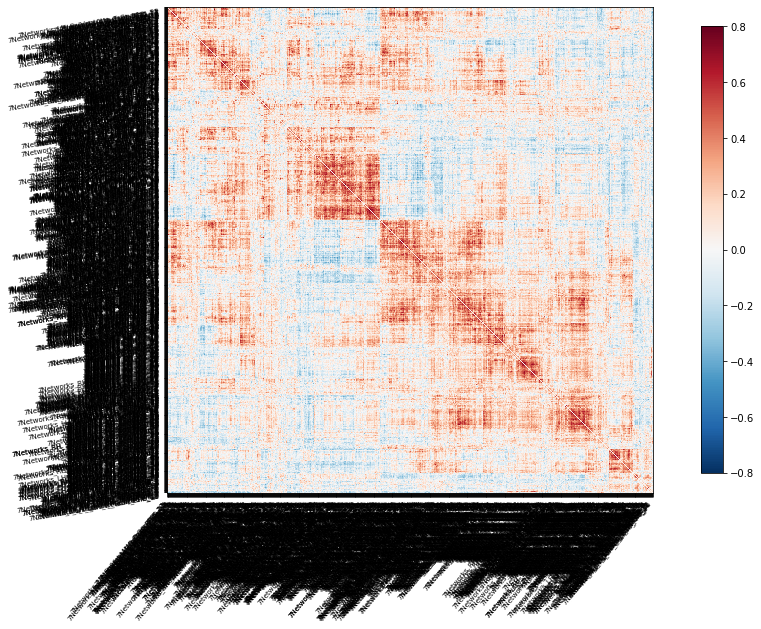

In [4]:
from connectivity_matrix import plot_conn_mat

plot_conn_mat(epic='late', subject=1)

# plot brain

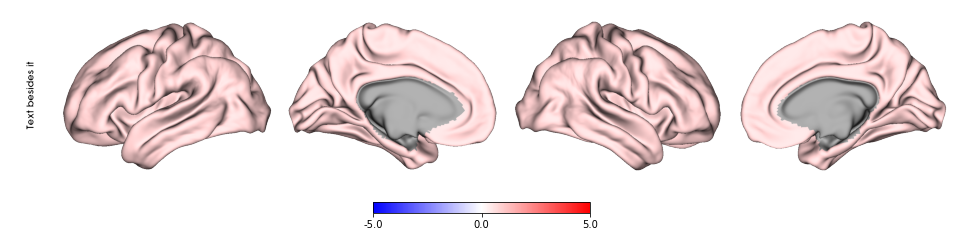

In [6]:
from plot_brain import plot_brain

plot_brain([1]*998, color_map='bwr',
           color_range=(-3, 5), text='Text besides it')

# gradient and eccentricity

In [1]:
from measures import make_measures

make_measures()

/Users/qasem/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Making gradients for subjects...


100%|██████████| 40/40 [00:18<00:00,  2.14it/s]


Making eccentricity...


100%|██████████| 119760/119760 [00:00<00:00, 690093.17it/s]


In [3]:
from measures import get_measures

get_measures(measures=['gradient1'], subjects=[2, 3])

Reading data from data/measures.csv


,region,value,subject,epic,measure
11976,0,0.496790,2,baseline,gradient1
11977,1,0.744780,2,baseline,gradient1
11978,2,0.640861,2,baseline,gradient1
11979,3,0.265293,2,baseline,gradient1
11980,4,-1.252707,2,baseline,gradient1
...,...,...,...,...,...
32929,993,-1.504329,3,late,gradient1
32930,994,-0.944637,3,late,gradient1
32931,995,-1.428845,3,late,gradient1
32932,996,-1.334512,3,late,gradient1


Reading data from data/measures.csv


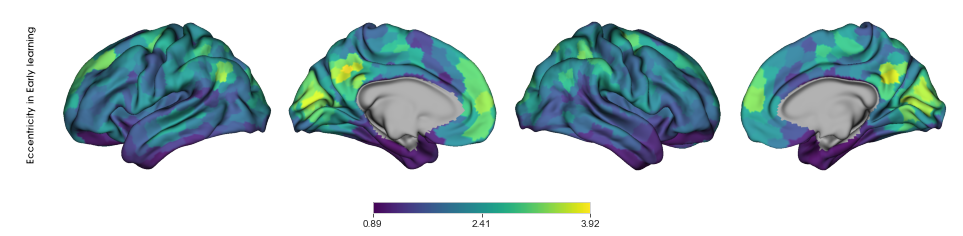

In [18]:
from measures import get_measures_avg
from plot_brain import plot_brain

v = get_measures_avg(epic_list=['early'],
             measures=['eccentricity'])

plot_brain(v.value, color_map='viridis', text='Eccentricity in Early learning')

# statistics

## repeated measures ANOVA

In [1]:
from measures import get_measures

df = get_measures()

/Users/qasem/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Reading data from data/measures.csv


In [3]:
from stats import get_rm_anova

df_stats = get_rm_anova(df)
f_stat = df_stats[df_stats.measure=='eccentricity'].F
p_values = df_stats[df_stats.measure=='eccentricity'].pvalue

Computing repeated measures ANOVA...


100%|██████████| 4990/4990 [00:49<00:00, 101.02it/s]


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


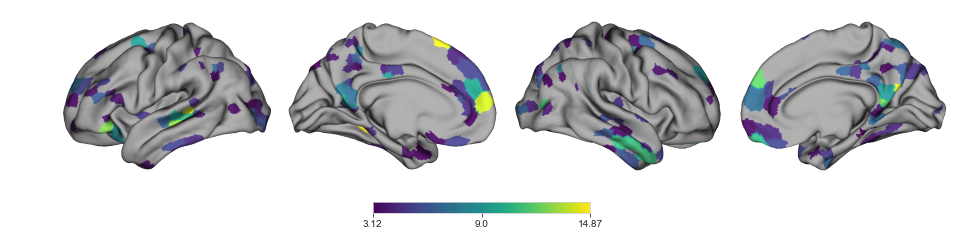

In [6]:
from plot_brain import plot_brain_masked

plot_brain_masked(f_stat, p_values)

In [8]:
from stats import append_fdr

df_stats = append_fdr(df_stats)

In [15]:
df_stats

,region,measure,F,pvalue,fdr_significant,pvalue_corrected
0,0,eccentricity,0.055052,0.946473,False,0.964842
1,1,eccentricity,0.713457,0.493117,False,0.721557
2,2,eccentricity,0.216947,0.805457,False,0.905961
3,3,eccentricity,1.571570,0.214224,False,0.490358
4,4,eccentricity,14.869968,0.000003,True,0.001199
...,...,...,...,...,...,...
993,993,gradient4,1.904920,0.155695,False,0.401507
994,994,gradient4,0.431857,0.650845,False,0.841870
995,995,gradient4,2.676066,0.075152,False,0.269148
996,996,gradient4,5.068217,0.008524,False,0.078765


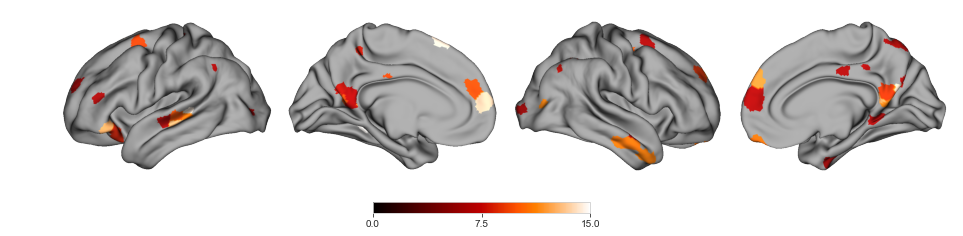

In [17]:
df_stats_ecc = df_stats[df_stats.measure == 'eccentricity']
plot_brain_masked(df_stats_ecc.F, df_stats_ecc.pvalue_corrected)

In [14]:
df_stats_ecc.fdr_significant.sum()

56

## pairwise t-tests

In [4]:
from stats import pairwise_ttests

df_stats_pairwise = pairwise_ttests(df)
df_stats_pairwise

  5%|▌         | 250/4990 [00:03<00:59, 79.75it/s]


KeyboardInterrupt: 

In [11]:
df_contrast = df_stats_pairwise.loc['eccentricity', 'early', 'late']

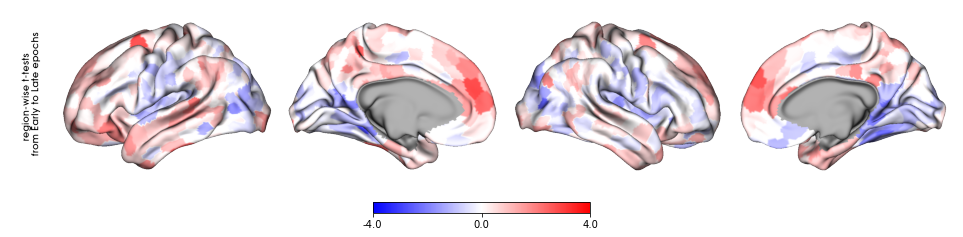

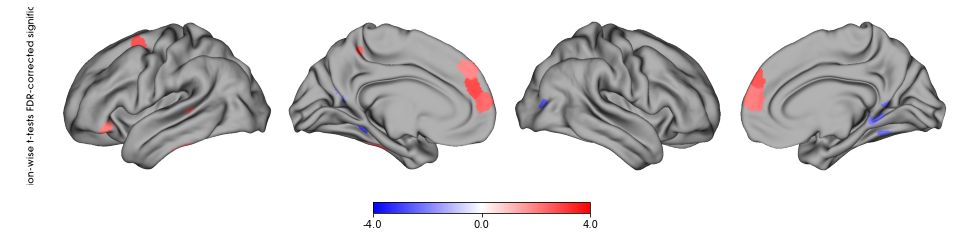

In [12]:
from plot_brain import plot_brain_masked, plot_brain

plot_brain(df_contrast['tstat'],
           text='region-wise t-tests \n from Early to Late epochs', color_range=(-4, 4), color_map='bwr')
plot_brain_masked(df_contrast['tstat'], df_contrast['pvalue_corrected'],
                  text='region-wise t-tests FDR-corrected significant', color_range=(-4, 4), color_map='bwr')

In [13]:
df_contrast[df_contrast.pvalue_corrected < 0.05]

region     tstat  pvalue_corrected
measure      A     B                                       
eccentricity early late       4 -3.115595          0.003853
                   late     146  2.371107          0.030304
                   late     226  3.024057          0.010126
                   late     281  2.744736          0.012878
                   late     312  2.537998          0.039424
                   late     413  2.216621          0.044343
                   late     422  2.239869          0.041920
                   late     433  2.569334          0.018144
                   late     441  3.090314          0.004157
                   late     447  2.179966          0.048414
                   late     465 -2.410331          0.027439
                   late     468 -2.226875          0.043260
                   late     471 -2.193343          0.046892
                   late     503 -2.551393          0.038055
                   late     530 -2.307678          0.041058
                   late     550 -2.661292          0.014172
                   late     777 -2.592666          0.034101
                   late     961  2.328185          0.033742
                   late     966  2.938234          0.006509
                   late     979 -2.385266          0.029240
                   late     981 -2.275885          0.038395

In [1]:
from load_timeseries import get_regions_names

get_regions_names([4, 550])

['7Networks_LH_Vis_5', '7Networks_RH_Vis_52']

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


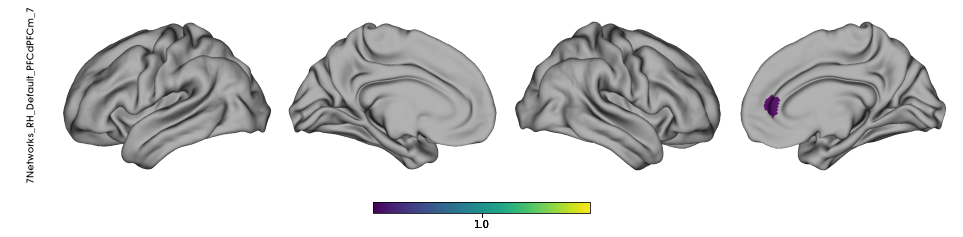

In [5]:
from load_timeseries import spot_region, get_regions_names

sample_region = 960
plot_brain(spot_region(sample_region),
           text=get_regions_names(sample_region)[0])

# seed connectivity

In [7]:
import sys, warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from measures import get_measures

df = get_measures()

from plot_brain import plot_brain

Reading data from data/measures.csv


In [8]:
from stats import get_rm_anova

get_rm_anova(df)

Computing repeated measures ANOVA...


100%|██████████| 4990/4990 [00:48<00:00, 102.88it/s]


,measure,region,F,pvalue
0,eccentricity,0,0.055052,0.946473
1,gradient1,0,0.096277,0.908320
2,gradient2,0,1.104485,0.336508
3,gradient3,0,2.115690,0.127416
4,gradient4,0,11.048819,0.000060
...,...,...,...,...
4985,eccentricity,997,0.298368,0.742872
4986,gradient1,997,2.507119,0.088052
4987,gradient2,997,0.148096,0.862590
4988,gradient3,997,2.032526,0.137885
